In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as ff
from scipy.stats import norm

%config InlineBackend.figure_format = 'retina'

In [2]:
def option_value(
    type: str,
    S: float | np.ndarray,
    K: float | np.ndarray,
    sigma: float,
    t: float = 0,
    r: float = 0,
):
    """
    Calculate the value of an option using the Black-Scholes model

    :param type: "call"/"c" or "put"/"p"
    :type type: str
    :param S: price of the underlying
    :type S: float | np.ndarray
    :param K: strike price of option
    :type K: float | np.ndarray
    :param sigma: input implied volatility
    :type sigma: float
    :param t: time to expiration
    :type t: float, optional
    :param r: risk-free rate
    :type r: float, optional
    """

    with np.errstate(divide="ignore"):
        _d1 = np.divide(1, sigma * np.sqrt(t)) * (
            np.log(S / K) + (r + sigma**2 / 2) * t
        )
        _d2 = _d1 - sigma * np.sqrt(t)
    if type.lower() in {"c", "call"}:
        return np.multiply(norm.cdf(_d1), S) - np.multiply(
            norm.cdf(_d2), K * np.exp(-r * t)
        )
    elif type.lower() in {"p", "put"}:
        return -np.multiply(norm.cdf(-_d1), S) + np.multiply(
            norm.cdf(-_d2), K + np.exp(-r * t)
        )

In [3]:
# Butterfly construction
# use SPY ~604 as of today
# ATM IV30d ~13.04%

S = np.linspace(575, 625, 1000)
C1 = option_value("c", S, 590, sigma=0.141)  # 590C iv30d = 14.1%
C2 = -option_value("c", S, 605, sigma=0.14)  # 605C iv30d = 14.0%
C3 = option_value("c", S, 620, sigma=0.12)  # 620C iv30d = 12.0%
butterfly = C1 + 2 * C2 + C3


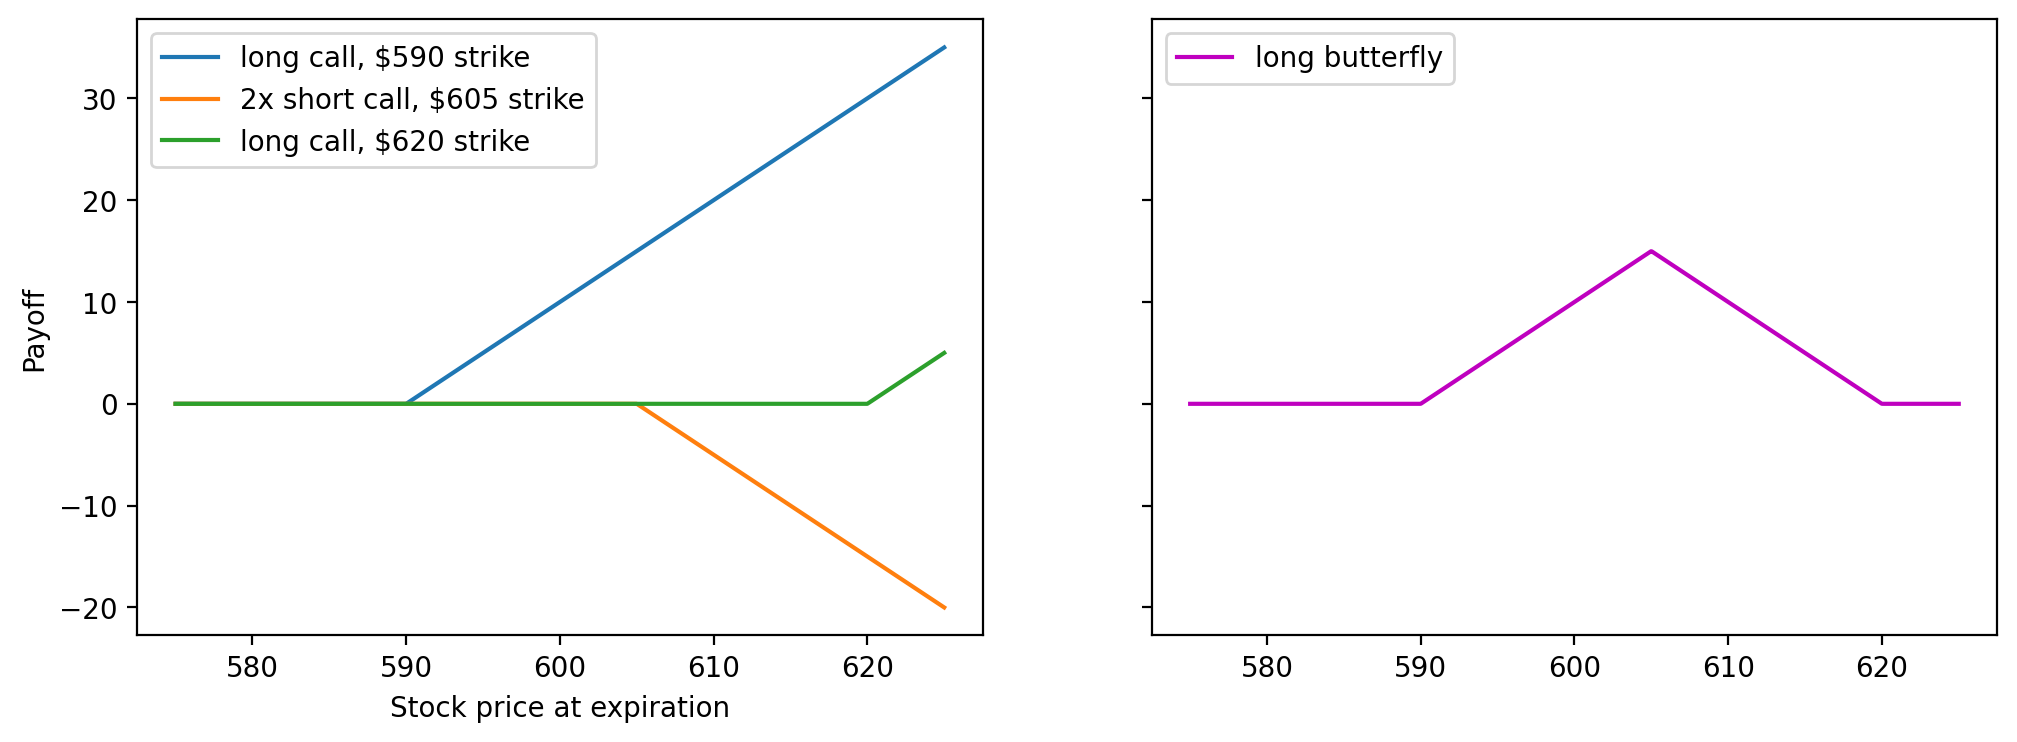

In [4]:
# payoff diagrams
# plt.switch_backend("qtagg")
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
ax.plot(S, C1, S, C2, S, C3)
ax.set_xlabel("Stock price at expiration")
ax.set_ylabel("Payoff")
ax.legend(
    [
        "long call, $590 strike",
        "2x short call, $605 strike",
        "long call, $620 strike",
    ],
    loc="best",
)

ax1.plot(S, butterfly, c="m")
ax1.legend(["long butterfly"], loc="upper left")
plt.show()